In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
from pandas import set_option
from pandas import get_dummies
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [4]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.shape

(41188, 21)

In [6]:
bank.dtypes
#categorized correctly 

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
print(list(bank.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [8]:
bank['duration']

0         261
1         149
2         226
3         151
4         307
5         198
6         139
7         217
8         380
9          50
10         55
11        222
12        137
13        293
14        146
15        174
16        312
17        440
18        353
19        195
20         38
21        262
22        342
23        181
24        172
25         99
26         93
27        233
28        255
29        362
         ... 
41158     363
41159     514
41160     843
41161     510
41162     347
41163     385
41164    1868
41165     403
41166     651
41167     236
41168     144
41169     154
41170     293
41171     112
41172     353
41173     329
41174     208
41175     180
41176     360
41177     124
41178     483
41179     151
41180     254
41181     281
41182     112
41183     334
41184     383
41185     189
41186     442
41187     239
Name: duration, Length: 41188, dtype: int64

In [9]:
stats = bank.describe().T

In [10]:
stats['unique'] = [len(bank[column].unique()) for column in stats.index]
stats['null'] = [bank[column].isnull().sum() for column in stats.index]
stats
#no null values 

,count,mean,std,min,25%,50%,75%,max,unique,null
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000,78,0
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000,1544,0
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000,42,0
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000,27,0
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000,8,0
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400,10,0
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767,26,0
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900,26,0
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045,316,0
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100,11,0


In [11]:
cat_stats = bank.describe(include=['object','category']).T
cat_stats['null'] = [bank[column].isnull().sum() for column in cat_stats.index]
cat_stats

,count,unique,top,freq,null
job,41188,12,admin.,10422,0
marital,41188,4,married,24928,0
education,41188,8,university.degree,12168,0
default,41188,3,no,32588,0
housing,41188,3,yes,21576,0
loan,41188,3,no,33950,0
contact,41188,2,cellular,26144,0
month,41188,10,may,13769,0
day_of_week,41188,5,thu,8623,0
poutcome,41188,3,nonexistent,35563,0


In [12]:
import seaborn as sns

In [13]:
corr=bank.corr()
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


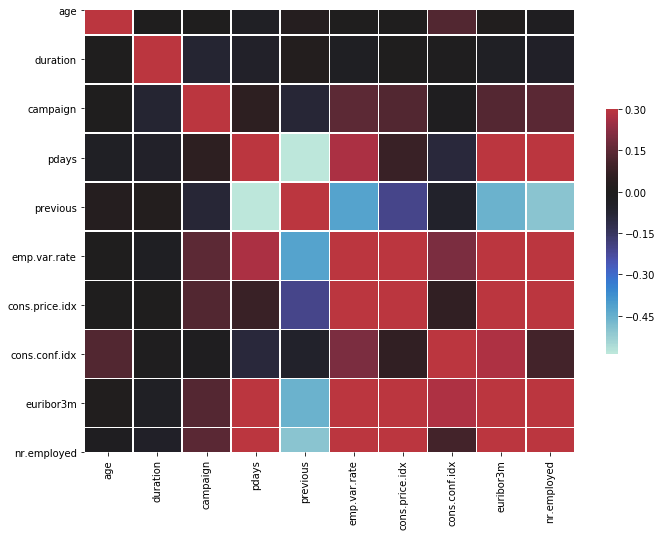

In [14]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

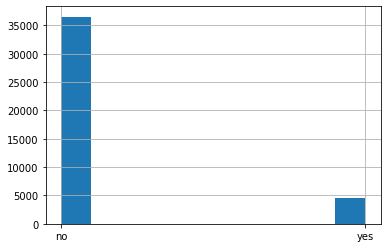

In [15]:
bank['y'].hist()

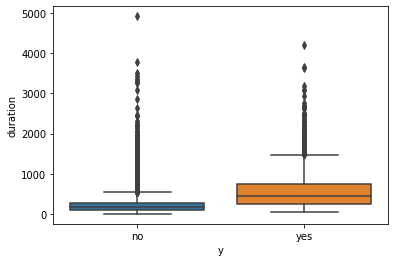

In [16]:
ax = sns.boxplot(x="y", y="duration", data=bank)

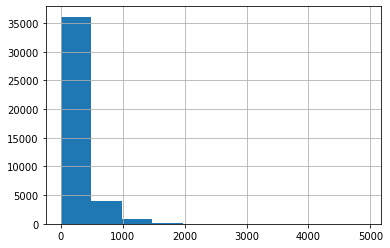

In [17]:
bank['duration'].hist()

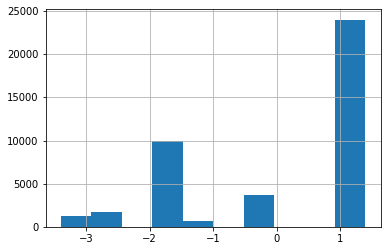

In [18]:
bank['emp.var.rate'].hist()

[Text(0, 0, 'age'),
 Text(0, 0, 'duration'),
 Text(0, 0, 'campaign'),
 Text(0, 0, 'pdays'),
 Text(0, 0, 'previous'),
 Text(0, 0, 'emp.var.rate'),
 Text(0, 0, 'cons.price.idx'),
 Text(0, 0, 'cons.conf.idx'),
 Text(0, 0, 'euribor3m'),
 Text(0, 0, 'nr.employed')]

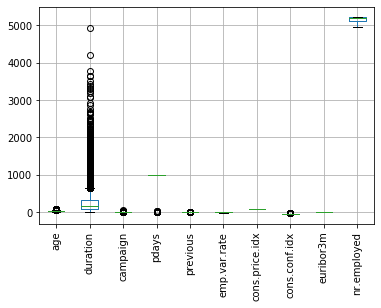

In [19]:
ax = bank.boxplot() 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

How the duration variable is described in the UCI database:
 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
As a result, in order to build an accurate predictive model, I will drop this column. 

In [20]:
bankdrop=bank.drop('duration', axis=1)

In [21]:
bankdrop.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

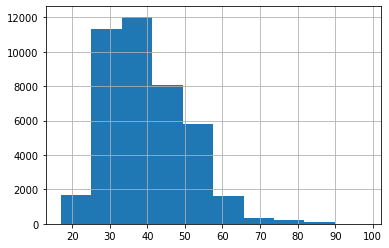

In [22]:
bankdrop['age'].hist()

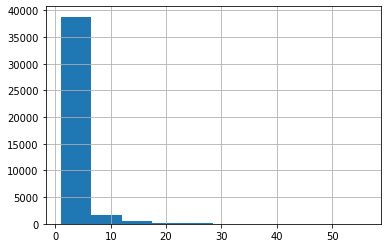

In [23]:
bankdrop['campaign'].hist()

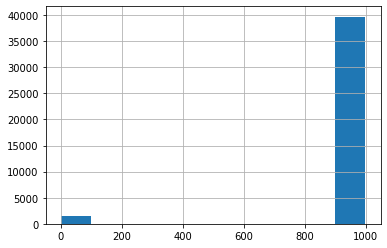

In [24]:
bankdrop['pdays'].hist()

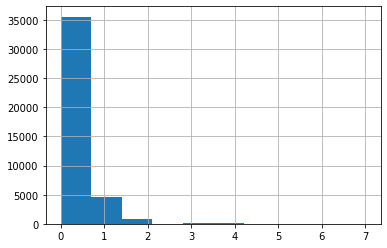

In [25]:
bankdrop['previous'].hist()

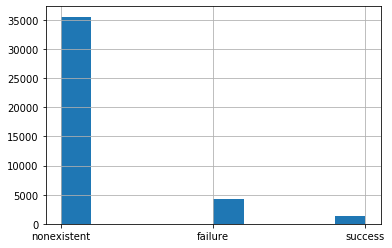

In [26]:
bankdrop['poutcome'].hist()

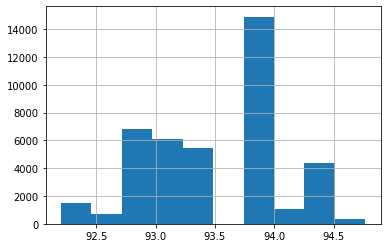

In [27]:
bankdrop['cons.price.idx'].hist()

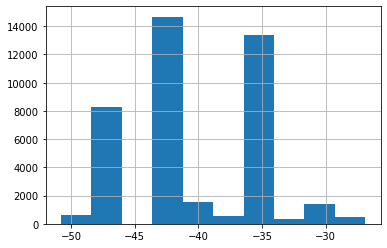

In [28]:
bankdrop['cons.conf.idx'].hist()

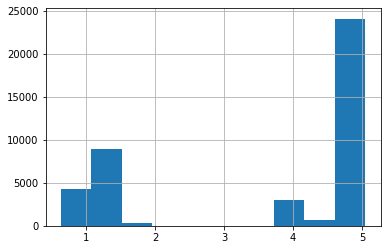

In [29]:
bankdrop['euribor3m'].hist()

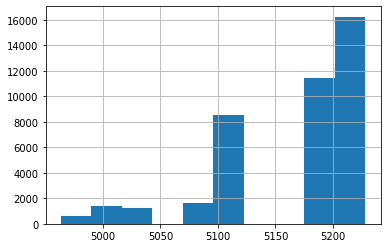

In [30]:
bankdrop['nr.employed'].hist()

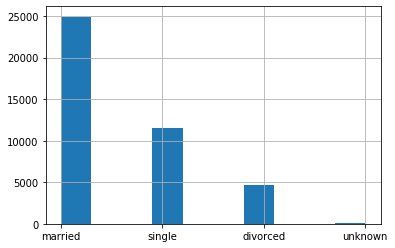

In [31]:
bankdrop['marital'].hist()

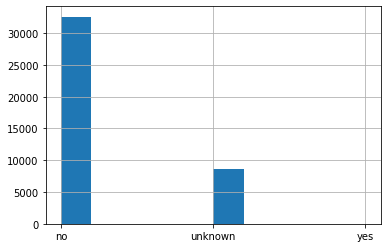

In [32]:
bankdrop['default'].hist()

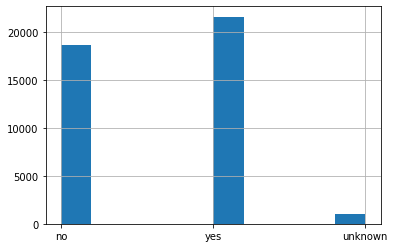

In [33]:
bankdrop['housing'].hist()

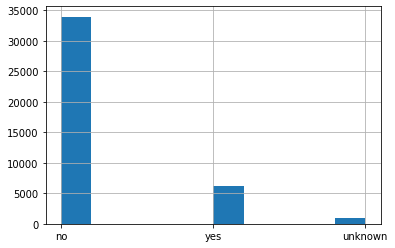

In [34]:
bankdrop['loan'].hist()

[Text(0, 0, 'age'),
 Text(0, 0, 'campaign'),
 Text(0, 0, 'pdays'),
 Text(0, 0, 'previous'),
 Text(0, 0, 'emp.var.rate'),
 Text(0, 0, 'cons.price.idx'),
 Text(0, 0, 'cons.conf.idx'),
 Text(0, 0, 'euribor3m'),
 Text(0, 0, 'nr.employed')]

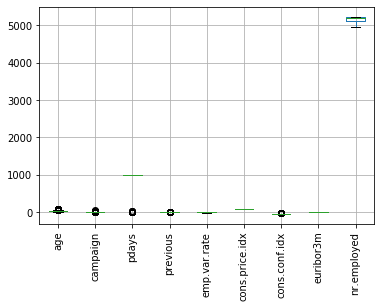

In [35]:
ax = bankdrop.boxplot() 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [36]:
bankdrop['education'].nunique()

8

In [37]:
bankdrop['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [38]:
bankdrop['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [39]:
bankdrop['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [40]:
bankdrop['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [41]:
bankdrop['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [42]:
bankdrop['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [43]:
bankdrop['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [44]:
bankdrop['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [45]:
bankdrop['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [46]:
bankdrop['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [47]:
bankdrop['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

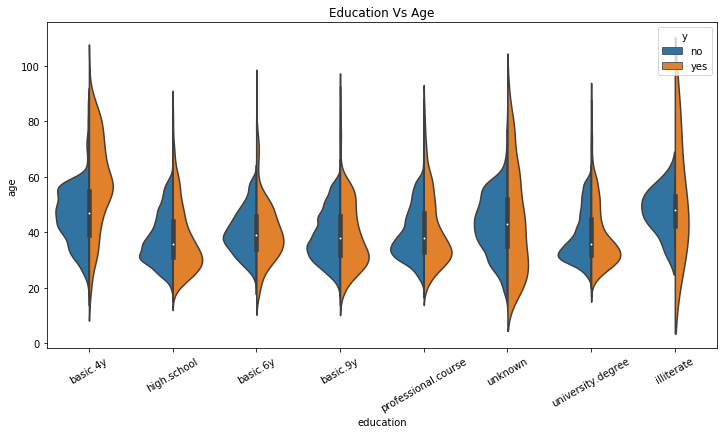

In [48]:
plt.figure(figsize = (12,6))
plt.title("Education Vs Age")
g = sns.violinplot(x=bank.education, y=bank.age, hue=bank.y, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

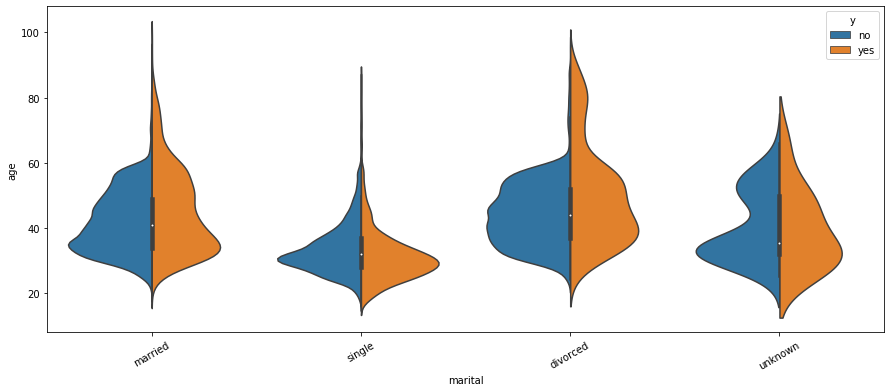

In [49]:
plt.figure(figsize = (15,6))
g = sns.violinplot(x=bank.marital, y=bank.age, hue=bank.y, split=True)
tick_labels = g.set_xticklabels(g.get_xticklabels(),rotation=30)

In [50]:
#Both bank and bankdrop datasets will be used in this exercise
#bank for benchmarking and bankdrop for more precise predictions 
#As a result, one hot encoding will be used on both to turn categorical data into data that can be included in models

In [51]:
#Function documentation for get dummies indicates that when columns are not specified, OHE will be applied
#to all columns encoded as objects. As a result, the categorical data does not need to be transformed here 
#before applying the necessary function
bankdrop_dum = pd.get_dummies(bankdrop)
bank_dum = pd.get_dummies(bank)

In [52]:
bankdrop_dum.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [53]:
bank_dum.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [54]:
bankdrop_dum.head(5)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,1,0,0,0,0,1,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0


In [55]:
bank_dum.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [56]:
featuresOnlyb = bank_dum.loc[:, 'age':'poutcome_success']

In [57]:
featuresOnlyb.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [58]:
featuresOnlybr = bankdrop_dum.loc[:, 'age':'poutcome_success']

In [59]:
featuresOnlybr.head(5)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [60]:
Xb_entire = featuresOnlyb.values

In [61]:
Xbr_entire = featuresOnlybr.values

In [62]:
Y_entire = bank_dum['y_yes'].values

In [63]:
#now have the X dataset with duration excluded and included, and the Y dataset of the successful deposits 

In [64]:
#full bank data
X_trainb, X_testb, Y_train, Y_test = train_test_split(Xb_entire,Y_entire, test_size = 0.2)

In [65]:
#logistic regression with full bank data - benchmarking
logisticRegr = LogisticRegression()
logisticRegr.fit(X_trainb, Y_train)

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
predictions = logisticRegr.predict(X_testb)

In [67]:
score = logisticRegr.score(X_testb, Y_test)
score
#find a way to get to accuracy score higher than 91-account for effect of duration 

0.9150279193979121

In [68]:
confusion_matrix(Y_test, predictions)

array([[7172,  174],
       [ 526,  366]], dtype=int64)

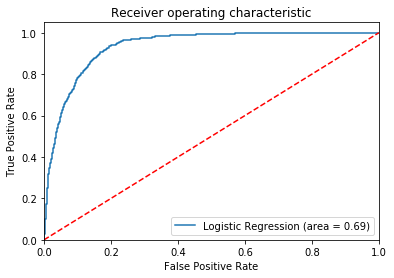

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, predictions)
fpr, tpr, thresholds = roc_curve(Y_test, logisticRegr.predict_proba(X_testb)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [70]:
#two questions - 1. How to get above 91? 2. Find model that is comparable while excluding duration. 

In [71]:
#random forest
forest = RandomForestClassifier()
forest.fit(X_trainb, Y_train)
y_predict = forest.predict(X_testb)
accuracy_score(Y_test, y_predict)


C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9079873755765963

In [72]:
#naive bayes
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(X_trainb, Y_train).predict(X_testb)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(Y_test, pred, normalize = True))

Naive-Bayes accuracy :  0.8701141053653799


In [73]:
#KNN 3 neighbors
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(X_trainb, Y_train)
# predict the response
pred = neigh.predict(X_testb)
# evaluate accuracy
print ("3 KNeighbors accuracy score : ",accuracy_score(Y_test, pred))

3 KNeighbors accuracy score :  0.9014323865015781


In [74]:
#KNN 2 neighbors
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=2)
#Train the algorithm
neigh.fit(X_trainb, Y_train)
# predict the response
pred = neigh.predict(X_testb)
# evaluate accuracy
print ("2 KNeighbors accuracy score : ",accuracy_score(Y_test, pred))

2 KNeighbors accuracy score :  0.9011896091284293


In [75]:
#KNN 4 neighbors
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=4)
#Train the algorithm
neigh.fit(X_trainb, Y_train)
# predict the response
pred = neigh.predict(X_testb)
# evaluate accuracy
print ("4 KNeighbors accuracy score : ",accuracy_score(Y_test, pred))

4 KNeighbors accuracy score :  0.9066521000242778


In [76]:
#KNN 5 neighbors
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=5)
#Train the algorithm
neigh.fit(X_trainb, Y_train)
# predict the response
pred = neigh.predict(X_testb)
# evaluate accuracy
print ("5 KNeighbors accuracy score : ",accuracy_score(Y_test, pred))

5 KNeighbors accuracy score :  0.9083515416363195


In [77]:
#decision tree
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_trainb,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_testb)
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.8890507404709881


In [78]:
#benchmark logistic regression with the most highest accuracy score 91.1, and the Random Forest in 2nd with 90.5

In [79]:
#now looking at the same models using the dataset without duration included
X_trainbr, X_testbr, Y_train, Y_test = train_test_split(Xbr_entire,Y_entire, test_size = 0.2)

In [80]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_trainbr, Y_train)
predictions = logisticRegr.predict(X_testbr)
score = logisticRegr.score(X_testbr, Y_test)
print(score)
confusion_matrix(Y_test, predictions)

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.902282107307599


array([[7236,   93],
       [ 712,  197]], dtype=int64)

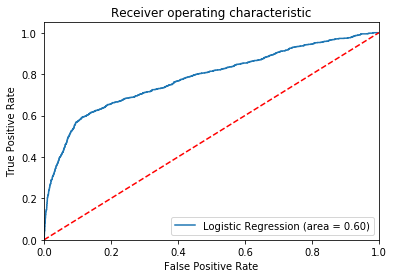

In [81]:
logit_roc_auc = roc_auc_score(Y_test, predictions)
fpr, tpr, thresholds = roc_curve(Y_test, logisticRegr.predict_proba(X_testbr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [82]:
#random forest
forest = RandomForestClassifier()
forest.fit(X_trainbr, Y_train)
y_predict = forest.predict(X_testbr)
accuracy_score(Y_test, y_predict)

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8891721291575625

In [83]:
#naive bayes
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(X_trainbr, Y_train).predict(X_testbr)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(Y_test, pred, normalize = True))

Naive-Bayes accuracy :  0.8534838553046856


In [84]:
#KNN 4 neighbors
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=4)
#Train the algorithm
neigh.fit(X_trainbr, Y_train)
# predict the response
pred = neigh.predict(X_testbr)
# evaluate accuracy
print ("4 KNeighbors accuracy score : ",accuracy_score(Y_test, pred))

4 KNeighbors accuracy score :  0.891964068948774


In [85]:
#decision tree
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_trainbr,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_testbr)
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.8455935906773488


In [86]:
#accuracy scores fairly close to each other, all things considered
#however, literature review turned up one interesting issue--the imbalance between yes and no of the target variable
#the overwhelming majority of "no" may have something to do with the across the board high accuracy of most models
#how to do deal with this? 
#the approach I'll use here is oversampling - essentially making the smaller "yes" group bigger and comparable to "no"
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [87]:
#first with full bank data
smt = SMOTE()
X_trainbn, Y_trainn = smt.fit_sample(X_trainb, Y_train)

In [88]:
#check count of records
np.bincount(Y_trainn)
#smaller class now equal to previously larger class

array([29219, 29219], dtype=int64)

In [89]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_trainbn, Y_trainn)
predictions = logisticRegr.predict(X_testb)
score = logisticRegr.score(X_testb, Y_test)
print(score)
confusion_matrix(Y_test, predictions)

#need to normalize data

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5058266569555717


array([[3736, 3593],
       [ 478,  431]], dtype=int64)

In [90]:
from sklearn.metrics import recall_score
recall_score(Y_test, predictions)

0.47414741474147415

In [91]:
scaler = StandardScaler()
X = scaler.fit_transform(Xb_entire)

In [92]:
X_trainb, X_testb, Y_train, Y_test = train_test_split(X,Y_entire, test_size = 0.2)

In [93]:
smt = SMOTE()
X_trainbn, Y_trainn = smt.fit_sample(X_trainb, Y_train)

In [94]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_trainbn, Y_trainn)
predictions = logisticRegr.predict(X_testb)
score = logisticRegr.score(X_testb, Y_test)
print(score)
print(recall_score(Y_test, predictions))
confusion_matrix(Y_test, predictions)

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8674435542607429
0.8654848800834203


array([[6316,  963],
       [ 129,  830]], dtype=int64)

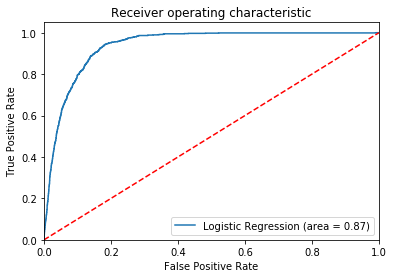

In [95]:
logit_roc_auc = roc_auc_score(Y_test, predictions)
fpr, tpr, thresholds = roc_curve(Y_test, logisticRegr.predict_proba(X_testb)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [96]:
scaler = StandardScaler()
XX = scaler.fit_transform(Xbr_entire)

In [97]:
X_trainbr, X_testbr, Y_train, Y_test = train_test_split(XX,Y_entire, test_size = 0.2)

In [98]:
smt = SMOTE()
X_trainbrn, Y_trainn = smt.fit_sample(X_trainbr, Y_train)

In [111]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_trainbrn, Y_trainn)
predictions = logisticRegr.predict(X_testbr)
score = logisticRegr.score(X_testbr, Y_test)
print(score)
print(recall_score(Y_test, predictions))
print(classification_report(Y_test, predictions))
confusion_matrix(Y_test, predictions)

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8108764263170672
0.6575963718820862
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7356
           1       0.32      0.66      0.43       882

    accuracy                           0.81      8238
   macro avg       0.63      0.74      0.66      8238
weighted avg       0.88      0.81      0.84      8238



array([[6100, 1256],
       [ 302,  580]], dtype=int64)

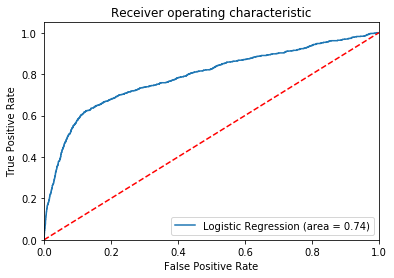

In [100]:
logit_roc_auc = roc_auc_score(Y_test, predictions)
fpr, tpr, thresholds = roc_curve(Y_test, logisticRegr.predict_proba(X_testbr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [110]:
#random forest
forest = RandomForestClassifier()
forest.fit(X_trainbrn, Y_trainn)
y_predict = forest.predict(X_testbr)
print(accuracy_score(Y_test, y_predict))
print(classification_report(Y_test, y_predict))

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8858946346200534
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7356
           1       0.46      0.34      0.39       882

    accuracy                           0.89      8238
   macro avg       0.69      0.65      0.66      8238
weighted avg       0.87      0.89      0.88      8238



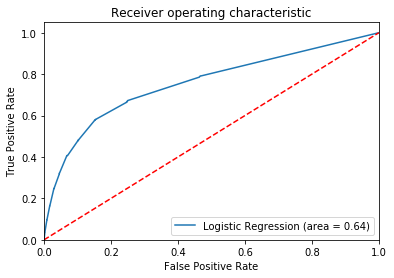

In [102]:
logit_roc_auc = roc_auc_score(Y_test, y_predict)
fpr, tpr, thresholds = roc_curve(Y_test, forest.predict_proba(X_testbr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [103]:
#naive bayes
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(X_trainbrn, Y_trainn).predict(X_testbr)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(Y_test, pred, normalize = True))

Naive-Bayes accuracy :  0.6263656227239621


In [104]:
#KNN 4 neighbors
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=4)
#Train the algorithm
neigh.fit(X_trainbrn, Y_trainn)
# predict the response
pred = neigh.predict(X_testbr)
# evaluate accuracy
print ("4 KNeighbors accuracy score : ",accuracy_score(Y_test, pred))

4 KNeighbors accuracy score :  0.806385044913814


In [105]:
#decision tree
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_trainbrn,Y_trainn)

#Predict the response for test dataset
Y_pred = clf.predict(X_testbr)
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.8466860888565185


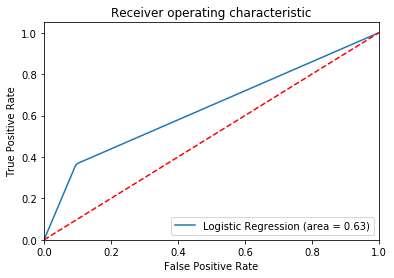

In [106]:
logit_roc_auc = roc_auc_score(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, clf.predict_proba(X_testbr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [107]:
#Random forest with highest accuracy 
#however recall can be improved